In [3]:
import tensorflow as tf
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
print("train size: ", len(x_train), "test size: ", len(x_test))

train size:  60000 test size:  10000


In [7]:
print("input size: ", x_train[0].shape)

input size:  (28, 28, 1)


In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


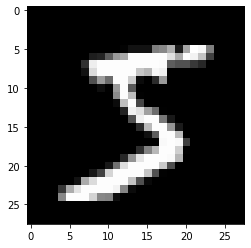

5

In [9]:
pixels = x_train[0]
plt.imshow(pixels, cmap='gray')
plt.show()
y_train[0]

In [10]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28,1),padding='valid',activation="relu"),
#   tf.keras.layers.MaxPooling2D((2, 2)),
#   tf.keras.layers.Conv2D(16, (3,3),padding='valid',activation="relu"),
#   tf.keras.layers.MaxPooling2D((2, 2)),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(100, activation='relu'),
  
# tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10),
#     #tf.keras.layers.Softmax()
# ])
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.61072946, -0.23302442, -0.23943062, -0.51862836, -0.13728672,
         0.37121037, -0.04858902,  0.96971613,  0.06879938,  0.08954753]],
      dtype=float32)

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.05030443, 0.07339077, 0.07292211, 0.05515758, 0.08076435,
        0.1342942 , 0.08825527, 0.24433461, 0.09924801, 0.10132873]],
      dtype=float32)

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [15]:
loss_fn(y_train[:1], predictions).numpy()

2.0077224

In [16]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4857 - accuracy: 0.8578
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1528 - accuracy: 0.9543
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1129 - accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0705 - accuracy: 0.9781


In [18]:
!pwd

/tf/workspace


In [19]:
model.save("./mnist_base_line_model")
model.save_weights('./mnist_base_line_model_weights')


INFO:tensorflow:Assets written to: ./mnist_base_line_model/assets


In [20]:
model.evaluate(x_test,  y_test, verbose=2)


313/313 - 1s - loss: 0.0738 - accuracy: 0.9783


[0.07384626567363739, 0.9782999753952026]

In [22]:
model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -7.532568 ,  -1.4414915,  -4.2496066,  -2.7368846,  -5.6341314,
        -11.143668 , -13.479533 ,  12.222927 ,  -9.799255 ,  -3.2433317]],
      dtype=float32)>

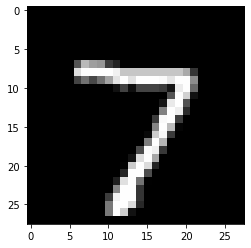

In [23]:

plt.imshow(x_test[0], cmap='gray')
plt.show()

In [24]:
x_test[:1].shape

(1, 28, 28, 1)